# Custom OMR Model Training
Based on the colab tutorial on https://roboflow.com/model/yolov4-pytorch

Since everything was set up locally, this starts on [This Step](https://colab.research.google.com/drive/1b08y_nUYv5UtDY211NFfINY7Hy_pgZDt#scrollTo=TvwlqXkSlwUm&line=1&uniqifier=1)
---
We start below with getting the number of classes for training:

In [3]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('dataset/train/_classes.txt')

In [4]:
print(num_classes)

8


# Now Let's Train our custom detection model

Pytorch is incredibly finicky with CUDA versions, the version you have on your device may not work with the current torch installed by poetry from a custom source (CUDA 12), make sure the right version of cudnn is install and libnccl as well.

In [29]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
%mkdir data
%cp valid/_annotations.txt data/val.txt
%cp valid/*.jpg train/

In [30]:
import torch
print(torch.cuda.is_available()) # check that everything works

True


In [33]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
!python ./pytorch-YOLOv4/train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained ./pytorch-YOLOv4/cfg/yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 50

log file path:log/log_2024-06-25_01-44-22.txt
2024-06-25 01:44:22,916 train.py[line:435] INFO: Using device cuda
2024-06-25 01:44:24,354 train.py[line:268] INFO: Starting training:
        Epochs:          50
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   60
        Validation size: 6
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 8
        Train label path:train.txt
        Pretrained:
    
Epoch 1/50:   0%|         | 0/60 [00:00<?, ?img/s]OpenCV can't augment image: 608 x 608
OpenCV can't augment image: 608 x 608
OpenCV can't augment image: 608 x 608
OpenCV can't augment image: 608 x 608
OpenCV can't augment image: 608 x 608
OpenCV can't augment image: 608 x 608
OpenCV can't augment image: 608 x 608
OpenCV can't augment image: 608 x 608
OpenCV can't augment image: 608 x 608
OpenCV can't augment image: 608 x 608
OpenCV can't au

In [34]:
!ls checkpoints

Yolov4_epoch10.pth  Yolov4_epoch22.pth	Yolov4_epoch34.pth  Yolov4_epoch46.pth
Yolov4_epoch11.pth  Yolov4_epoch23.pth	Yolov4_epoch35.pth  Yolov4_epoch47.pth
Yolov4_epoch12.pth  Yolov4_epoch24.pth	Yolov4_epoch36.pth  Yolov4_epoch48.pth
Yolov4_epoch13.pth  Yolov4_epoch25.pth	Yolov4_epoch37.pth  Yolov4_epoch49.pth
Yolov4_epoch14.pth  Yolov4_epoch26.pth	Yolov4_epoch38.pth  Yolov4_epoch4.pth
Yolov4_epoch15.pth  Yolov4_epoch27.pth	Yolov4_epoch39.pth  Yolov4_epoch50.pth
Yolov4_epoch16.pth  Yolov4_epoch28.pth	Yolov4_epoch3.pth   Yolov4_epoch5.pth
Yolov4_epoch17.pth  Yolov4_epoch29.pth	Yolov4_epoch40.pth  Yolov4_epoch6.pth
Yolov4_epoch18.pth  Yolov4_epoch2.pth	Yolov4_epoch41.pth  Yolov4_epoch7.pth
Yolov4_epoch19.pth  Yolov4_epoch30.pth	Yolov4_epoch42.pth  Yolov4_epoch8.pth
Yolov4_epoch1.pth   Yolov4_epoch31.pth	Yolov4_epoch43.pth  Yolov4_epoch9.pth
Yolov4_epoch20.pth  Yolov4_epoch32.pth	Yolov4_epoch44.pth
Yolov4_epoch21.pth  Yolov4_epoch33.pth	Yolov4_epoch45.pth


In [44]:
#choose random test image
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

In [47]:
%%time
##change the epoch here to the one you would like to use for inference
!python ./pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch50.pth {img_path} test/_classes.txt

Traceback (most recent call last):
  File "/home/franph/projects/capstone/project-falcon/tasks/OMR-tool/model_training/./pytorch-YOLOv4/models.py", line 443, in <module>
    model.load_state_dict(pretrained_dict)
  File "/home/franph/projects/capstone/project-falcon/tasks/OMR-tool/.venv/lib64/python3.12/site-packages/torch/nn/modules/module.py", line 2189, in load_state_dict
    raise RuntimeError('Error(s) in loading state_dict for {}:\n\t{}'.format(
RuntimeError: Error(s) in loading state_dict for Yolov4:
	Missing key(s) in state_dict: "neck.conv1.conv.0.weight", "neck.conv1.conv.1.weight", "neck.conv1.conv.1.bias", "neck.conv1.conv.1.running_mean", "neck.conv1.conv.1.running_var", "neck.conv2.conv.0.weight", "neck.conv2.conv.1.weight", "neck.conv2.conv.1.bias", "neck.conv2.conv.1.running_mean", "neck.conv2.conv.1.running_var", "neck.conv3.conv.0.weight", "neck.conv3.conv.1.weight", "neck.conv3.conv.1.bias", "neck.conv3.conv.1.running_mean", "neck.conv3.conv.1.running_var", "neck.con

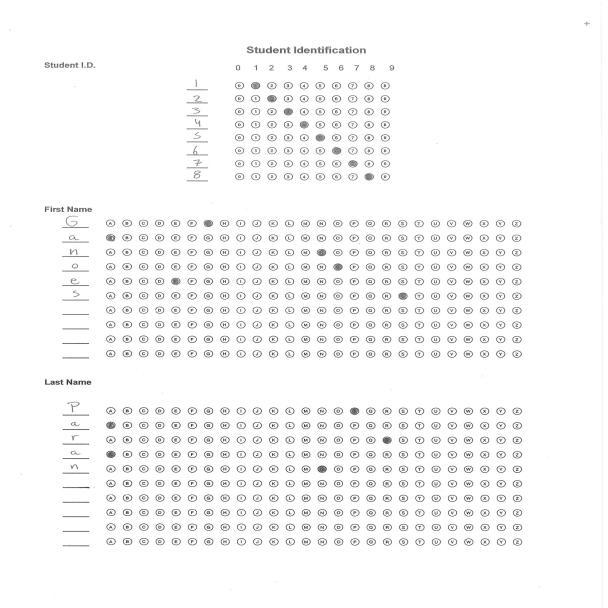

In [46]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')